In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# f = open("C://Users/hitec/Documents/mydata.txt", 'r', encoding='UTF8')

In [3]:
db = pd.read_csv("서울교통공사_혼잡도_20191231.csv", header=0, engine='python')
df = DataFrame(db)
df.head()

,조사일자,호선,역번호,역명,구분,구분.1,5:30,6:00,6:30,7:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
0,평일,1호선,150,서울역,상선,혼잡도,8.20%,12.90%,21.50%,28.40%,...,15.10%,15.90%,17.10%,16.00%,19.00%,15.20%,10.50%,7.80%,6.00%,0.90%
1,평일,1호선,150,서울역,하선,혼잡도,11.80%,13.50%,12.20%,17.80%,...,36.50%,31.20%,37.60%,44.60%,45.60%,37.80%,28.80%,19.30%,7.10%,0.40%
2,평일,1호선,151,시청,상선,혼잡도,7.70%,11.20%,19.60%,24.40%,...,18.70%,18.30%,20.70%,22.00%,24.00%,18.70%,13.70%,10.00%,6.90%,1.00%
3,평일,1호선,151,시청,하선,혼잡도,9.50%,11.30%,11.60%,16.70%,...,32.00%,27.70%,34.80%,39.30%,37.40%,36.30%,23.00%,18.10%,4.00%,1.60%
4,평일,1호선,152,종각,상선,혼잡도,6.30%,8.10%,15.50%,16.60%,...,25.80%,24.20%,30.00%,31.90%,34.00%,26.80%,18.80%,12.50%,9.10%,1.20%


In [5]:
df['호선']

0       1호선
1       1호선
2       1호선
3       1호선
4       1호선
       ... 
1663    8호선
1664    8호선
1665    8호선
1666    8호선
1667    8호선
Name: 호선, Length: 1668, dtype: object

In [4]:
is_wkday = df['조사일자']=="평일"
is_line1 = df['호선']=="1호선"
df_subset = df[is_wkday & is_line1]

'''
DataFrame.set_index(key, drop, append, inplace)
DataFrame.reset_index(drop, inplace)
'''

df_subset.set_index('역번호', drop=True, append=False, inplace=True)
df_subset.head()

,조사일자,호선,역명,구분,구분.1,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역번호,,,,,,,,,,,,,,,,,,,,,
150,평일,1호선,서울역,상선,혼잡도,8.20%,12.90%,21.50%,28.40%,46.70%,...,15.10%,15.90%,17.10%,16.00%,19.00%,15.20%,10.50%,7.80%,6.00%,0.90%
150,평일,1호선,서울역,하선,혼잡도,11.80%,13.50%,12.20%,17.80%,26.40%,...,36.50%,31.20%,37.60%,44.60%,45.60%,37.80%,28.80%,19.30%,7.10%,0.40%
151,평일,1호선,시청,상선,혼잡도,7.70%,11.20%,19.60%,24.40%,36.20%,...,18.70%,18.30%,20.70%,22.00%,24.00%,18.70%,13.70%,10.00%,6.90%,1.00%
151,평일,1호선,시청,하선,혼잡도,9.50%,11.30%,11.60%,16.70%,23.20%,...,32.00%,27.70%,34.80%,39.30%,37.40%,36.30%,23.00%,18.10%,4.00%,1.60%
152,평일,1호선,종각,상선,혼잡도,6.30%,8.10%,15.50%,16.60%,22.70%,...,25.80%,24.20%,30.00%,31.90%,34.00%,26.80%,18.80%,12.50%,9.10%,1.20%


In [5]:
is_uptrack = df_subset['구분']=="상선"
df_uptrack = df_subset[is_uptrack]
df_uptrack.head()

,조사일자,호선,역명,구분,구분.1,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역번호,,,,,,,,,,,,,,,,,,,,,
150,평일,1호선,서울역,상선,혼잡도,8.20%,12.90%,21.50%,28.40%,46.70%,...,15.10%,15.90%,17.10%,16.00%,19.00%,15.20%,10.50%,7.80%,6.00%,0.90%
151,평일,1호선,시청,상선,혼잡도,7.70%,11.20%,19.60%,24.40%,36.20%,...,18.70%,18.30%,20.70%,22.00%,24.00%,18.70%,13.70%,10.00%,6.90%,1.00%
152,평일,1호선,종각,상선,혼잡도,6.30%,8.10%,15.50%,16.60%,22.70%,...,25.80%,24.20%,30.00%,31.90%,34.00%,26.80%,18.80%,12.50%,9.10%,1.20%
153,평일,1호선,종로3가,상선,혼잡도,6.30%,8.10%,14.40%,16.30%,22.90%,...,27.10%,25.20%,32.90%,33.80%,40.10%,28.90%,20.50%,14.20%,10.40%,1.20%
154,평일,1호선,종로5가,상선,혼잡도,5.60%,6.50%,12.40%,12.40%,16.50%,...,28.70%,27.60%,33.50%,34.90%,42.70%,29.10%,21.90%,14.00%,11.00%,1.10%


In [6]:
df_uptrack.drop(['조사일자','호선','역명','구분','구분.1'], axis=1, inplace=True)
df_uptrack.head()

C:\Users\SIMHYUNCHAE\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역번호,,,,,,,,,,,,,,,,,,,,,
150,8.20%,12.90%,21.50%,28.40%,46.70%,70.00%,74.50%,52.20%,57.10%,38.50%,...,15.10%,15.90%,17.10%,16.00%,19.00%,15.20%,10.50%,7.80%,6.00%,0.90%
151,7.70%,11.20%,19.60%,24.40%,36.20%,53.70%,51.70%,47.10%,47.10%,37.40%,...,18.70%,18.30%,20.70%,22.00%,24.00%,18.70%,13.70%,10.00%,6.90%,1.00%
152,6.30%,8.10%,15.50%,16.60%,22.70%,34.80%,28.70%,32.40%,35.00%,30.60%,...,25.80%,24.20%,30.00%,31.90%,34.00%,26.80%,18.80%,12.50%,9.10%,1.20%
153,6.30%,8.10%,14.40%,16.30%,22.90%,36.20%,34.80%,31.10%,32.50%,30.50%,...,27.10%,25.20%,32.90%,33.80%,40.10%,28.90%,20.50%,14.20%,10.40%,1.20%
154,5.60%,6.50%,12.40%,12.40%,16.50%,28.80%,23.60%,21.30%,28.60%,24.80%,...,28.70%,27.60%,33.50%,34.90%,42.70%,29.10%,21.90%,14.00%,11.00%,1.10%


In [7]:
cols = list(df_uptrack)

for col in cols:
    df_uptrack_pre = df_uptrack.replace('\%','',regex=True)

df_uptrack_pre.head()

,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역번호,,,,,,,,,,,,,,,,,,,,,
150,8.20,12.90,21.50,28.40,46.70,70.00,74.50,52.20,57.10,38.50,...,15.10,15.90,17.10,16.00,19.00,15.20,10.50,7.80,6.00,0.90
151,7.70,11.20,19.60,24.40,36.20,53.70,51.70,47.10,47.10,37.40,...,18.70,18.30,20.70,22.00,24.00,18.70,13.70,10.00,6.90,1.00
152,6.30,8.10,15.50,16.60,22.70,34.80,28.70,32.40,35.00,30.60,...,25.80,24.20,30.00,31.90,34.00,26.80,18.80,12.50,9.10,1.20
153,6.30,8.10,14.40,16.30,22.90,36.20,34.80,31.10,32.50,30.50,...,27.10,25.20,32.90,33.80,40.10,28.90,20.50,14.20,10.40,1.20
154,5.60,6.50,12.40,12.40,16.50,28.80,23.60,21.30,28.60,24.80,...,28.70,27.60,33.50,34.90,42.70,29.10,21.90,14.00,11.00,1.10


In [8]:
time = list(df_uptrack_pre)

df_uptrack_trans = df_uptrack_pre.transpose(copy=True)
df_uptrack2 = df_uptrack_trans.astype('float')
df_uptrack_assign = df_uptrack2.assign(Time=time)

df_uptrack_assign.reset_index(drop=True, inplace=True)
df_uptrack_assign.head()

역번호,150,151,152,153,154,155,156,157,158,159,Time
0,8.2,7.7,6.3,6.3,5.6,8.5,7.2,6.9,6.4,6.9,5:30
1,12.9,11.2,8.1,8.1,6.5,6.7,7.9,7.4,5.1,8.7,6:00
2,21.5,19.6,15.5,14.4,12.4,12.0,9.1,7.2,6.0,10.1,6:30
3,28.4,24.4,16.6,16.3,12.4,11.0,8.5,8.7,6.2,9.6,7:00
4,46.7,36.2,22.7,22.9,16.5,16.2,10.5,8.6,8.1,12.7,7:30


In [9]:
df_uptrack_plot = df_uptrack_assign.astype({'Time':'string'})
print(df_uptrack_plot.dtypes)

역번호
150     float64
151     float64
152     float64
153     float64
154     float64
155     float64
156     float64
157     float64
158     float64
159     float64
Time     string
dtype: object


In [10]:
list(df_uptrack_plot)

[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 'Time']

In [11]:
import seaborn as sns

In [12]:
df_uptrack_plot.head()

역번호,150,151,152,153,154,155,156,157,158,159,Time
0,8.2,7.7,6.3,6.3,5.6,8.5,7.2,6.9,6.4,6.9,5:30
1,12.9,11.2,8.1,8.1,6.5,6.7,7.9,7.4,5.1,8.7,6:00
2,21.5,19.6,15.5,14.4,12.4,12.0,9.1,7.2,6.0,10.1,6:30
3,28.4,24.4,16.6,16.3,12.4,11.0,8.5,8.7,6.2,9.6,7:00
4,46.7,36.2,22.7,22.9,16.5,16.2,10.5,8.6,8.1,12.7,7:30


In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Seoul Metropolitian Subway Line #1-Uptrack Pop-Time')

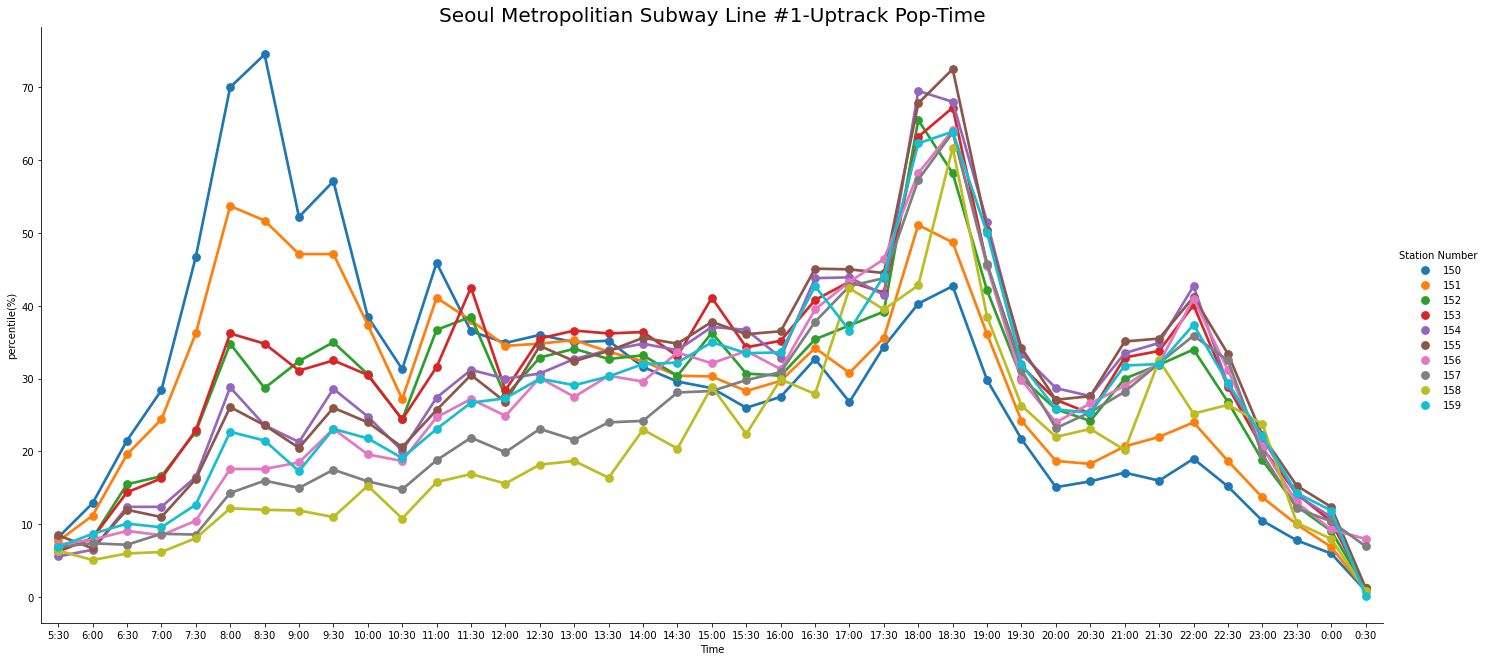

In [14]:
df_plot = df_uptrack_plot.melt('Time', var_name='Station Number', value_name='percentile(%)')
sns_plot = sns.catplot(x="Time", y="percentile(%)", hue='Station Number', data=df_plot, kind='point', height=9.0, aspect=19.5/9.0)
plt.title('Seoul Metropolitian Subway Line #1-Uptrack Pop-Time', fontsize=20)
# sns_plot.set_axis_labels("","Unit: %")
# g.set_titles("Seoul Metropolitian Subway Line #1-Uptrack Popular Time")

In [15]:
sns_plot.savefig("Seoul Line1 Uptrack pop-time")

In [16]:
'''
# 상-하선 구분 및 열 제거
is_uptrack = df_subset['구분']=="상선"
df_uptrack = df_subset[is_uptrack]
df_uptrack.drop(['조사일자','호선','구분','구분.1'], axis=1, inplace=True)

is_downtrack = df_subset['구분']=="하선"
df_downtrack = df_subset[is_downtrack]
df_downtrack.drop(['조사일자','호선','구분','구분.1'], axis=1, inplace=True)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-16-fd234bd13b97>, line 9)

## 변수 바꿔가며 만들어보자

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# f = open("C://Users/hitec/Documents/mydata.txt", 'r', encoding='UTF8')

In [3]:
db = pd.read_csv("서울교통공사_혼잡도_20191231.csv", header=0, engine='python')
df = DataFrame(db)
# df.head()
# df['호선']

In [4]:
is_wkday = df['조사일자']=="평일"
is_line1 = df['호선']=="3호선"
df_subset = df[is_wkday & is_line1]

'''
DataFrame.set_index(key, drop, append, inplace)
DataFrame.reset_index(drop, inplace)
'''

df_subset.set_index('역명', drop=True, append=False, inplace=True)
df_subset.head()

,조사일자,호선,역번호,구분,구분.1,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역명,,,,,,,,,,,,,,,,,,,,,
지축,평일,3호선,309,상선,혼잡도,20.10%,11.50%,11.30%,13.10%,14.10%,...,32.40%,43.60%,41.50%,40.90%,38.00%,41.00%,38.50%,30.00%,16.60%,15.40%
지축,평일,3호선,309,하선,혼잡도,24.60%,21.70%,40.00%,52.60%,82.40%,...,9.30%,11.50%,11.10%,9.30%,11.50%,12.60%,10.80%,5.50%,2.40%,6.10%
구파발,평일,3호선,310,상선,혼잡도,21.80%,13.30%,7.30%,9.20%,13.10%,...,29.20%,22.70%,30.40%,26.80%,27.20%,27.30%,22.10%,13.70%,11.10%,0.20%
구파발,평일,3호선,310,하선,혼잡도,12.90%,20.30%,30.70%,44.90%,65.40%,...,10.40%,9.00%,9.20%,10.30%,11.20%,10.50%,6.60%,4.80%,2.00%,4.80%
연신내,평일,3호선,311,상선,혼잡도,22.90%,14.10%,9.40%,12.20%,15.90%,...,33.60%,34.10%,31.30%,34.90%,32.30%,36.10%,26.80%,18.40%,14.70%,4.30%


In [5]:
is_uptrack = df_subset['구분']=="상선"
df_uptrack = df_subset[is_uptrack]
df_uptrack.head()

,조사일자,호선,역번호,구분,구분.1,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역명,,,,,,,,,,,,,,,,,,,,,
지축,평일,3호선,309,상선,혼잡도,20.10%,11.50%,11.30%,13.10%,14.10%,...,32.40%,43.60%,41.50%,40.90%,38.00%,41.00%,38.50%,30.00%,16.60%,15.40%
구파발,평일,3호선,310,상선,혼잡도,21.80%,13.30%,7.30%,9.20%,13.10%,...,29.20%,22.70%,30.40%,26.80%,27.20%,27.30%,22.10%,13.70%,11.10%,0.20%
연신내,평일,3호선,311,상선,혼잡도,22.90%,14.10%,9.40%,12.20%,15.90%,...,33.60%,34.10%,31.30%,34.90%,32.30%,36.10%,26.80%,18.40%,14.70%,4.30%
불광,평일,3호선,312,상선,혼잡도,19.70%,14.40%,9.40%,13.10%,16.80%,...,45.50%,42.80%,42.70%,46.30%,45.20%,43.10%,36.90%,24.20%,20.10%,9.60%
녹번,평일,3호선,313,상선,혼잡도,14.30%,11.40%,8.40%,11.70%,14.70%,...,47.00%,48.00%,40.10%,47.90%,47.70%,46.40%,36.70%,25.60%,21.40%,11.50%


In [6]:
df_uptrack.drop(['조사일자','호선','역번호','구분','구분.1'], axis=1, inplace=True)
df_uptrack

C:\Users\BCBL\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역명,,,,,,,,,,,,,,,,,,,,,
지축,20.10%,11.50%,11.30%,13.10%,14.10%,23.60%,17.30%,13.90%,16.10%,11.30%,...,32.40%,43.60%,41.50%,40.90%,38.00%,41.00%,38.50%,30.00%,16.60%,15.40%
구파발,21.80%,13.30%,7.30%,9.20%,13.10%,15.40%,9.90%,8.50%,9.70%,7.60%,...,29.20%,22.70%,30.40%,26.80%,27.20%,27.30%,22.10%,13.70%,11.10%,0.20%
연신내,22.90%,14.10%,9.40%,12.20%,15.90%,18.90%,11.60%,11.00%,11.60%,11.00%,...,33.60%,34.10%,31.30%,34.90%,32.30%,36.10%,26.80%,18.40%,14.70%,4.30%
불광,19.70%,14.40%,9.40%,13.10%,16.80%,18.60%,12.40%,12.20%,13.80%,12.40%,...,45.50%,42.80%,42.70%,46.30%,45.20%,43.10%,36.90%,24.20%,20.10%,9.60%
녹번,14.30%,11.40%,8.40%,11.70%,14.70%,15.10%,12.00%,11.80%,13.30%,12.10%,...,47.00%,48.00%,40.10%,47.90%,47.70%,46.40%,36.70%,25.60%,21.40%,11.50%
홍제,14.50%,13.30%,9.00%,11.30%,14.00%,15.10%,12.50%,12.00%,14.30%,12.00%,...,54.80%,50.00%,47.50%,49.40%,50.00%,53.40%,40.80%,28.80%,24.00%,13.70%
무악재,14.80%,14.00%,9.10%,12.10%,13.90%,15.40%,12.90%,13.60%,14.80%,13.20%,...,56.00%,55.20%,50.50%,56.70%,58.90%,54.50%,43.30%,32.80%,21.70%,13.50%
독립문,14.30%,14.10%,8.40%,11.90%,13.90%,15.70%,13.00%,13.70%,15.00%,13.30%,...,59.80%,56.60%,57.50%,50.70%,63.10%,54.70%,43.80%,34.00%,22.40%,14.20%
경복궁,18.00%,12.10%,9.30%,12.60%,14.10%,16.30%,13.40%,15.10%,14.90%,14.60%,...,63.50%,54.40%,58.60%,52.00%,64.40%,56.10%,45.10%,33.40%,23.40%,12.10%


In [7]:
cols = list(df_uptrack)

for col in cols:
    df_uptrack_pre = df_uptrack.replace('\%','',regex=True)

df_uptrack_pre.head()

,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역명,,,,,,,,,,,,,,,,,,,,,
지축,20.10,11.50,11.30,13.10,14.10,23.60,17.30,13.90,16.10,11.30,...,32.40,43.60,41.50,40.90,38.00,41.00,38.50,30.00,16.60,15.40
구파발,21.80,13.30,7.30,9.20,13.10,15.40,9.90,8.50,9.70,7.60,...,29.20,22.70,30.40,26.80,27.20,27.30,22.10,13.70,11.10,0.20
연신내,22.90,14.10,9.40,12.20,15.90,18.90,11.60,11.00,11.60,11.00,...,33.60,34.10,31.30,34.90,32.30,36.10,26.80,18.40,14.70,4.30
불광,19.70,14.40,9.40,13.10,16.80,18.60,12.40,12.20,13.80,12.40,...,45.50,42.80,42.70,46.30,45.20,43.10,36.90,24.20,20.10,9.60
녹번,14.30,11.40,8.40,11.70,14.70,15.10,12.00,11.80,13.30,12.10,...,47.00,48.00,40.10,47.90,47.70,46.40,36.70,25.60,21.40,11.50


In [8]:
time = list(df_uptrack_pre)

df_uptrack_trans = df_uptrack_pre.transpose(copy=True)
df_uptrack2 = df_uptrack_trans.astype('float')
df_uptrack_assign = df_uptrack2.assign(Time=time)

df_uptrack_assign.reset_index(drop=True, inplace=True)
# df_uptrack_assign.head()

df_uptrack_plot = df_uptrack_assign.astype({'Time':'string'})
# print(df_uptrack_plot.dtypes)

# list(df_uptrack_plot)
# df_uptrack_plot.head()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

'Windows'

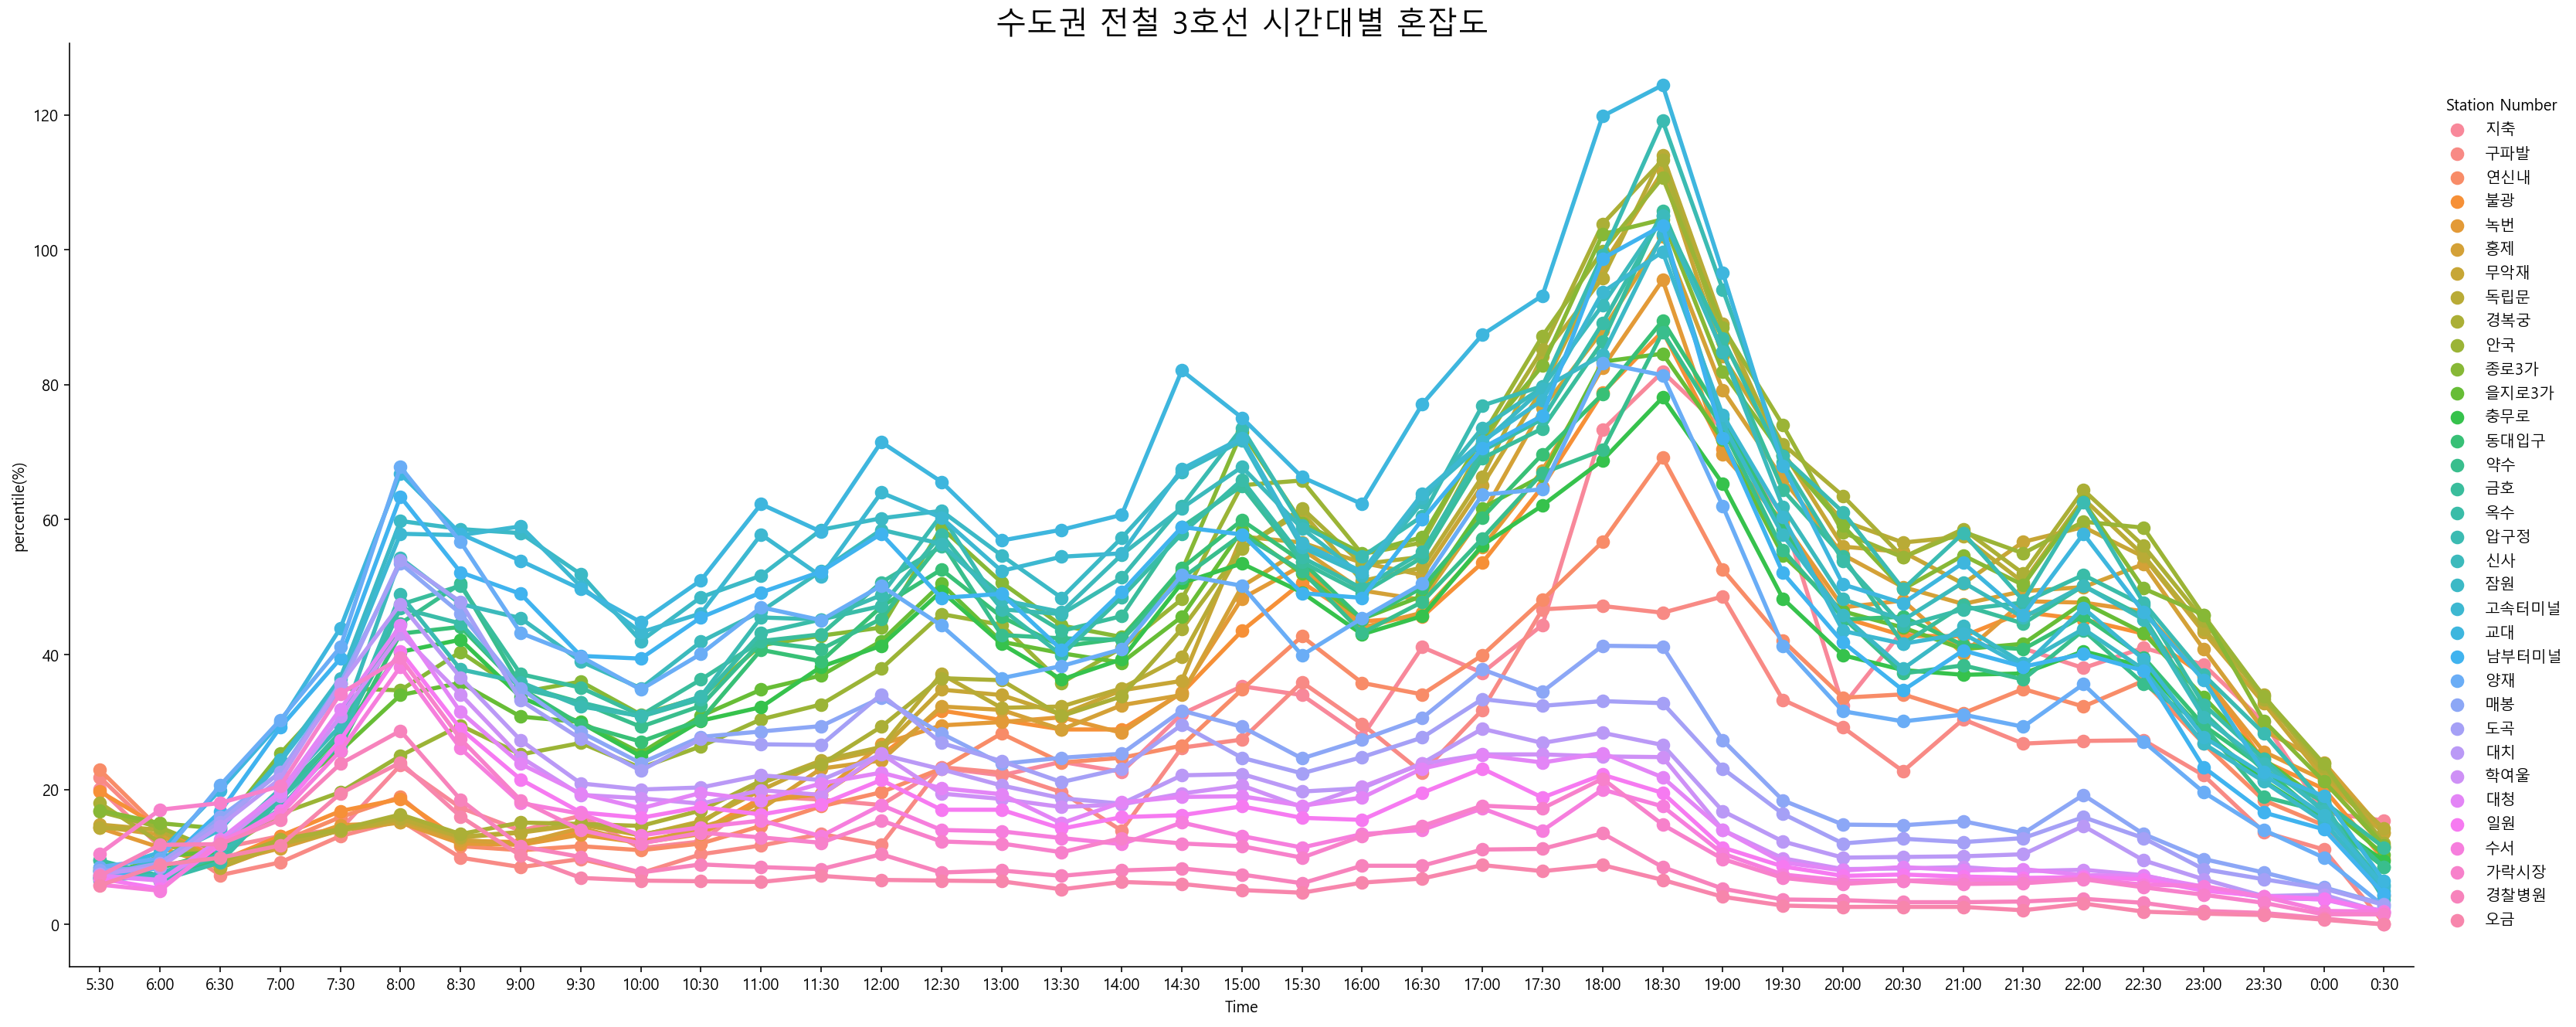

In [10]:
# 폰트 적용
# plt.rcParams['font.family'] = 'Segoe UI'
# Windows 환경 폰트 설정
platform.system() == 'Windows'
plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

df_plot = df_uptrack_plot.melt('Time', var_name='Station Number', value_name='percentile(%)')
sns_plot = sns.catplot(x="Time", y="percentile(%)", hue='Station Number', data=df_plot, kind='point', height=9.0, aspect=22.0/9.0)
plt.title('수도권 전철 3호선 시간대별 혼잡도', fontsize=20)
# sns_plot.set_axis_labels("","Unit: %")
# g.set_titles("Seoul Metropolitian Subway Line #1-Uptrack Popular Time")
sns_plot.savefig("line2up.png")